# CIFAR 10 PCA Implementation

This notebook demonstrates the implementation of PCA from scratch using barebones numpy and python.

Results are compared to the Scikit learn implementation for validation purposes

This is a supporting notebook to demonstrate competency by manually implementing the model to a different dataset that can be processed with the current hardware available.

- Author: Joshua A. Javier
- Date: January 13, 2021
- Liscence: MIT

In [1]:
from __future__ import print_function
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

import sys
import os, sys, tarfile, errno


## Load Dataset

In [2]:
train_set, train_label = tfds.as_numpy(tfds.load(
    'cifar10',
    split='train',
    batch_size=-1,
    as_supervised=True,
))

test_set, test_label = tfds.as_numpy(tfds.load(
    'cifar10',
    split='test',
    batch_size=-1,
    as_supervised=True,
))

In [3]:
norm_train = np.float32(train_set)/ 255.
norm_test = np.float32(test_set)/ 255.


n_images = train_set.shape[0]
indexes = np.random.randint(0, norm_train.shape[0], size=n_images)
images = norm_train[indexes]


## Utility function for loading images

50000


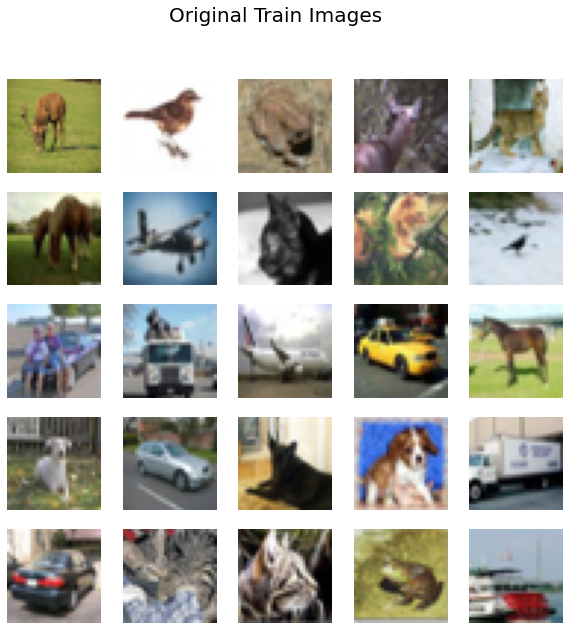

In [4]:
#util function for displaying images in a grid
def plot_images(images, title, n_images=25):
    plt.figure(figsize=(10,10))
    plt.suptitle(title, fontsize=20)
    side = int(math.sqrt(n_images))
    for i in range(n_images):
        plt.subplot(side, side, i + 1)
        image = images[i]
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()
    plt.close('all')
    
title = "Original Train Images"
print(len(images))
plot_images(images, title=title)
orig_shape = images.shape

# PCA from Scratch

Using the logic presented in the lecture the algorithm was implemented as learning exercise

In [5]:
# Standardize Dataset
images = np.float32(images)
mu = np.mean(images)
images -= mu

std = np.std(images)
images /= std
print("Before mean: {0}, std: {1}".format(mu,std))
mu1 = np.mean(images)
std1 = np.std(images)
print("After mean: {0}, std: {1}".format(mu1,std1))

Before mean: 0.47254443168640137, std: 0.25138697028160095
After mean: 3.4568874980323017e-06, std: 1.0


In [6]:
# from numpy import linalg as la
from scipy import linalg as la
print('Images shape', images.shape)
X = np.reshape(images,(-1,n_images))
std_images = X
S = np.matmul(X, np.transpose(X))/n_images
print('X.shape: {0}'.format(X.shape))
print('S.shape: {0}'.format(S.shape))

Images shape (50000, 32, 32, 3)
X.shape: (3072, 50000)
S.shape: (3072, 3072)


In [7]:
#D,B = la.eig(S,left=True,right=True)
D,B = la.eig(S,left=True,right=False)

print(B.shape)
print(D.shape)

(3072, 3072)
(3072,)


In [30]:
# Using 500 components
M = 500
BM = B[:,:M]
BM_BMT = np.matmul(BM,np.transpose(BM))
R = np.matmul(BM_BMT,X)
R = np.reshape(R, orig_shape)

# Reshape R to compare the mean squared error
r_reshape = np.reshape(R, (3072,50000))

In [9]:
R *= std
R += mu
R = np.clip(R, 0, 255)
mu1 = np.mean(R)
std1 = np.std(R)
print("After PCA mean: {0}, std: {1}".format(mu1,std1))

After PCA mean: 0.4728616178035736, std: 0.2244618535041809


## MSE calculation

In [29]:
error = mean_squared_error(std_images, r_reshape,squared=True)
print(error)

0.19769612


## Reconstruct Images from reduced dataset

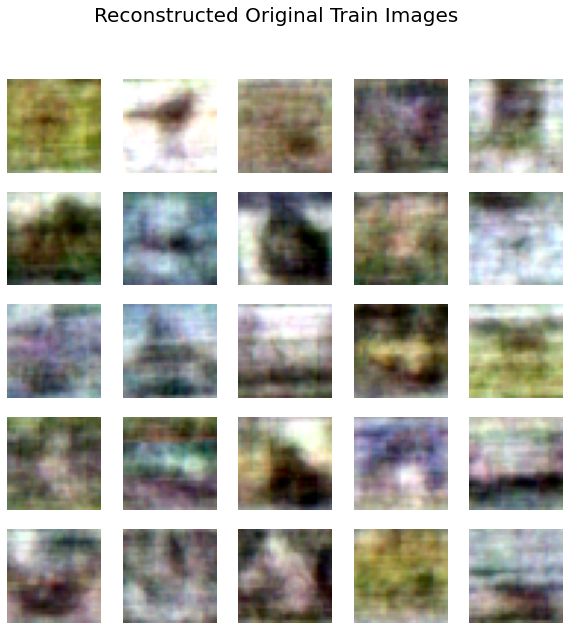

In [10]:
title = "Reconstructed Original Train Images"
plot_images(R, title=title)

# PCA using Scikit library

In [11]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [33]:
# Single PCA pass
n = 500
pca_ = PCA(n) # Using the same number of components implemented in the manual algorithm
principalComponents = pca_.fit_transform(std_images)
recon = pca_.inverse_transform(principalComponents)


## MSE calculation

In [32]:
mse = mean_squared_error(std_images, recon,squared=True)
print(f"MSE: {mse} with {n} components")

MSE: 0.19965378940105438 with 500 components


In [31]:
print(f"Before: {std_images.shape}")
print(f"After PCA: {principalComponents.shape}")

Before: (3072, 50000)
After PCA: (3072, 500)


### Reconstructed Images

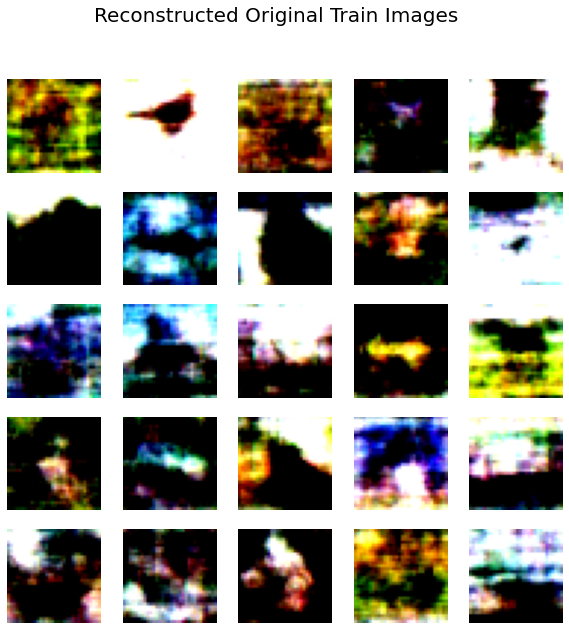

In [34]:
skpca = recon.reshape((-1,32,32,3))
title = "Reconstructed Original Train Images"
plot_images(skpca, title=title)

# Conclusion

From the implementation above using the Scikit Library and the Manual algorithm. They produced identical results as indicated by the MSE with minimal difference:
- MSE from Manual Algorithm: 0.1976912
- MSE from Scikit: 0.199653789